In [2]:
import lambdahat_helpers as lah
import os
import torch
import tqdm
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt

[LOADING HYPERPARAMETERS...]
algo : ppo
n_envs : 64
n_steps : 256
epoch : 3
mini_batch_per_epoch : 8
mini_batch_size : 2048
gamma : 0.999
lmbda : 0.95
learning_rate : 0.0005
grad_clip_norm : 0.5
eps_clip : 0.2
value_coef : 0.5
entropy_coef : 0.01
normalize_adv : True
normalize_rew : True
use_gae : True
architecture : impala
recurrent : False
INITIALIZAING ENVIRONMENTS...
INITIALIZAING LOGGER...


In [3]:
spreads_folder = "variance_data/spreads/6000-6010"
files = os.listdir(spreads_folder)
spreads = dict()
for file in files:
    with open(os.path.join(spreads_folder, file), "rb") as f:
        data = pickle.load(f)
    spreads.update(data)

results_folder = "variance_data/results/6000-6010/"
files = os.listdir(results_folder)
results = dict()
for file in files:
    with open(os.path.join(results_folder, file), "rb") as f:
        data = pickle.load(f)
    results.update(data)

In [4]:
min_spread = np.inf
min_spread_params = None
for params, spread in spreads.items():
    if spread < min_spread:
        min_spread = spread
        min_spread_params = params
print(min_spread)
print(min_spread_params)

8.089548
(3.981071705534969e-08, 11659.144011798311)


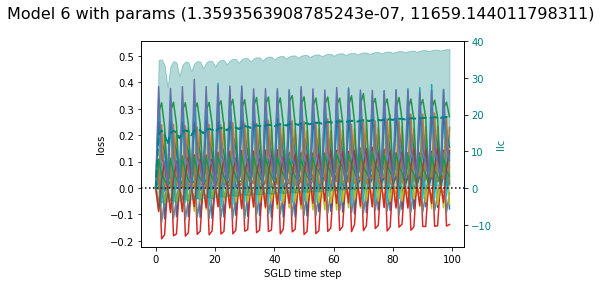

For model 6 with parameters (1.3593563908785243e-07, 11659.144011798311) we have spread 15.4794340133667



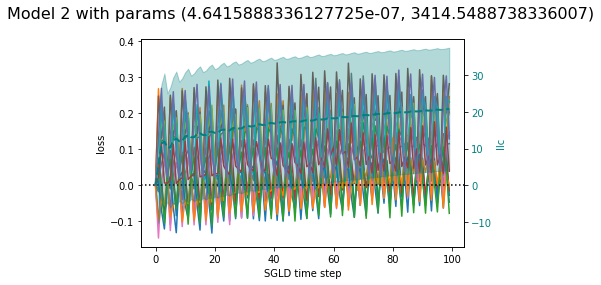

For model 2 with parameters (4.6415888336127725e-07, 3414.5488738336007) we have spread 21.501598358154297



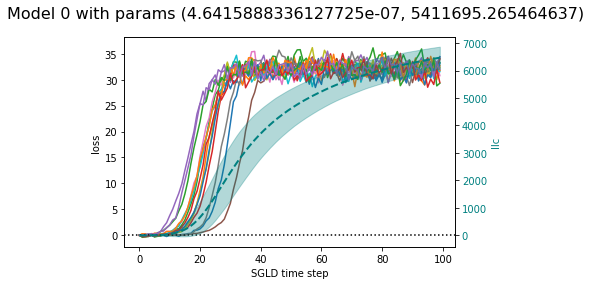

For model 0 with parameters (4.6415888336127725e-07, 5411695.265464637) we have spread 5634.52490234375



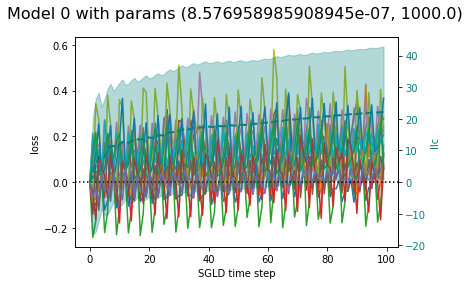

For model 0 with parameters (8.576958985908945e-07, 1000.0) we have spread 25.21118927001953



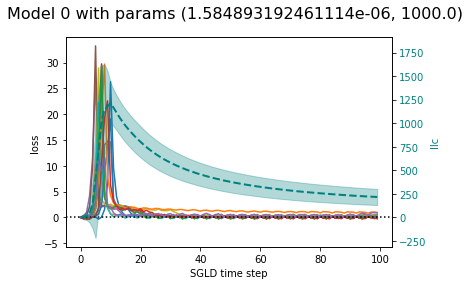

For model 0 with parameters (1.584893192461114e-06, 1000.0) we have spread 234.91009521484375



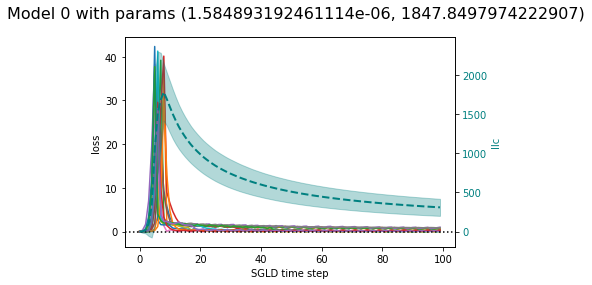

For model 0 with parameters (1.584893192461114e-06, 1847.8497974222907) we have spread 117.23992919921875



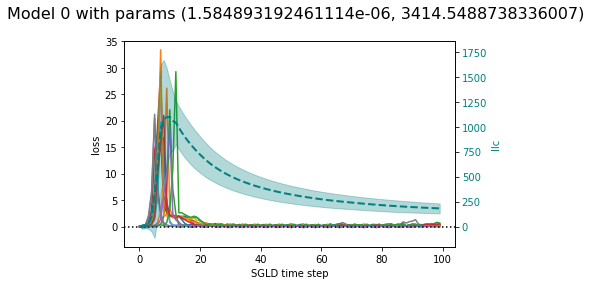

For model 0 with parameters (1.584893192461114e-06, 3414.5488738336007) we have spread 125.18820190429688



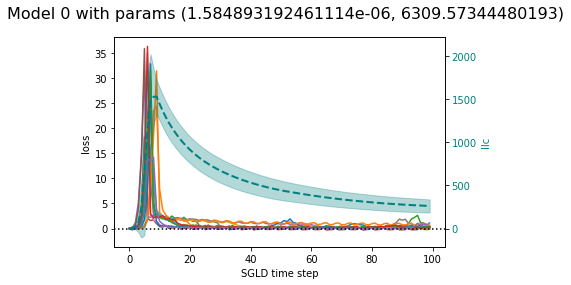

For model 0 with parameters (1.584893192461114e-06, 6309.57344480193) we have spread 167.85829162597656



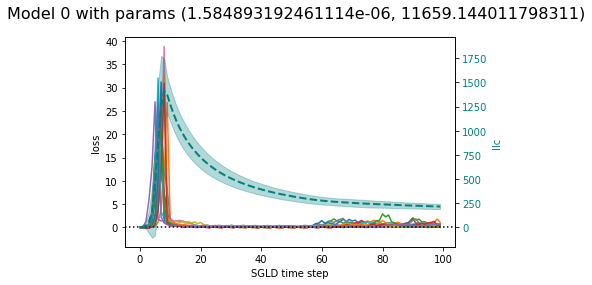

For model 0 with parameters (1.584893192461114e-06, 11659.144011798311) we have spread 207.61297607421875



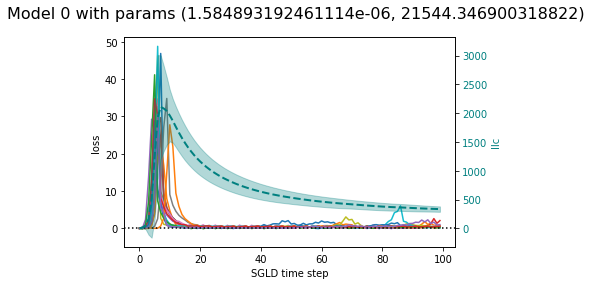

For model 0 with parameters (1.584893192461114e-06, 21544.346900318822) we have spread 111.06103515625



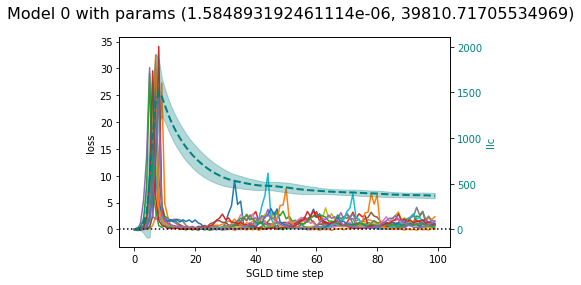

For model 0 with parameters (1.584893192461114e-06, 39810.71705534969) we have spread 192.97683715820312



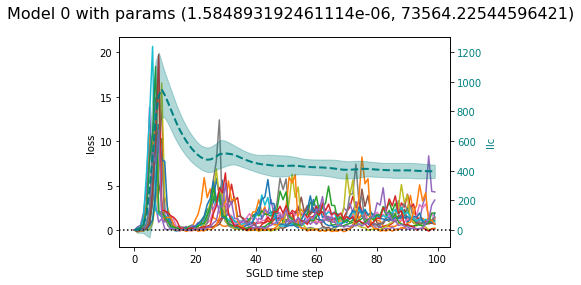

For model 0 with parameters (1.584893192461114e-06, 73564.22544596421) we have spread 285.5328369140625



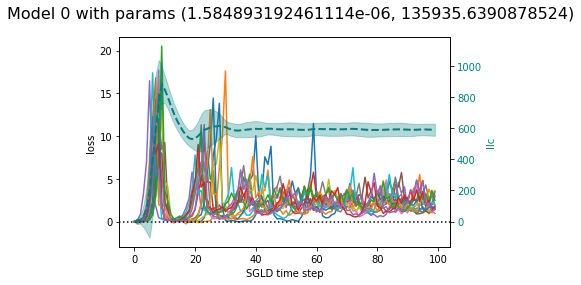

For model 0 with parameters (1.584893192461114e-06, 135935.6390878524) we have spread 445.42022705078125



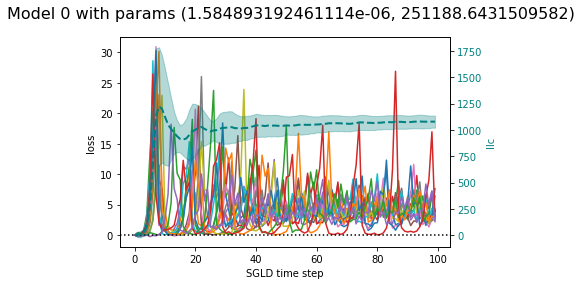

For model 0 with parameters (1.584893192461114e-06, 251188.6431509582) we have spread 712.119140625



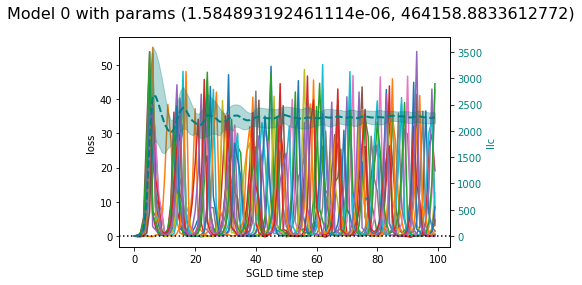

For model 0 with parameters (1.584893192461114e-06, 464158.8833612772) we have spread 583.54150390625



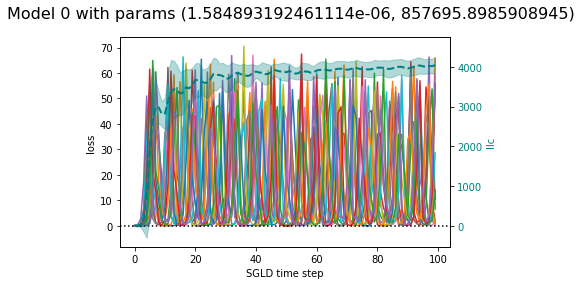

For model 0 with parameters (1.584893192461114e-06, 857695.8985908945) we have spread 2371.67333984375



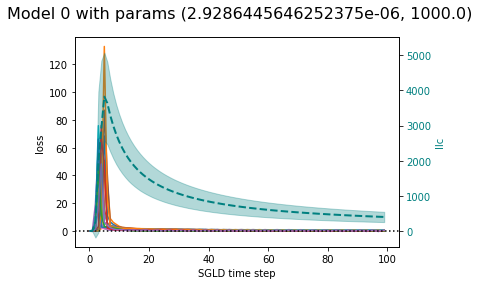

For model 0 with parameters (2.9286445646252375e-06, 1000.0) we have spread 269.8782653808594



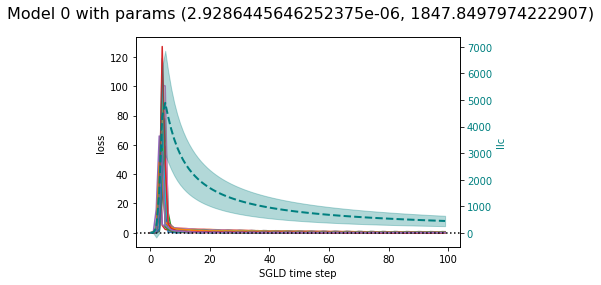

For model 0 with parameters (2.9286445646252375e-06, 1847.8497974222907) we have spread 243.2845458984375



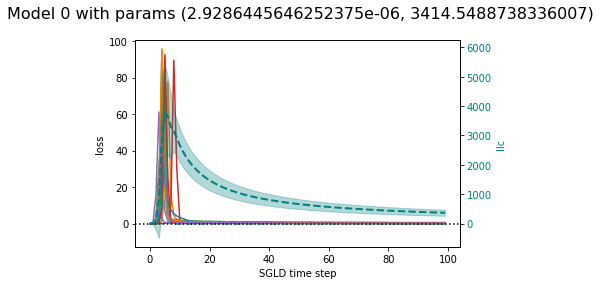

For model 0 with parameters (2.9286445646252375e-06, 3414.5488738336007) we have spread 152.37408447265625



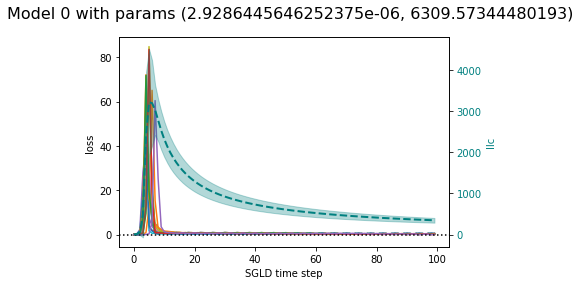

For model 0 with parameters (2.9286445646252375e-06, 6309.57344480193) we have spread 252.27423095703125



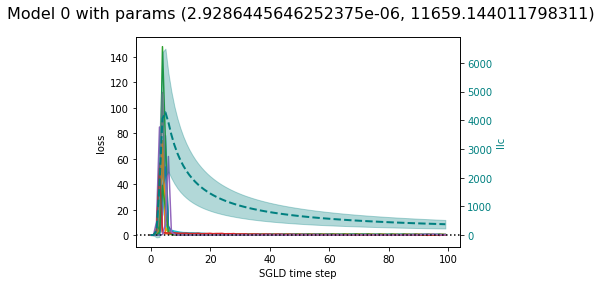

For model 0 with parameters (2.9286445646252375e-06, 11659.144011798311) we have spread 297.05267333984375



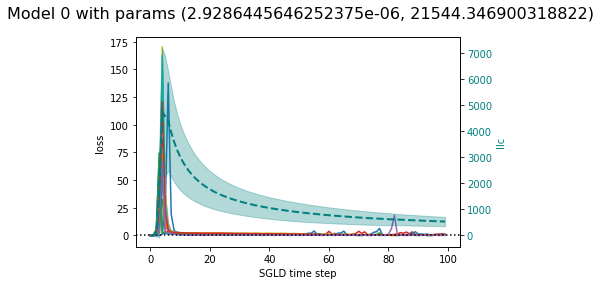

For model 0 with parameters (2.9286445646252375e-06, 21544.346900318822) we have spread 385.054931640625



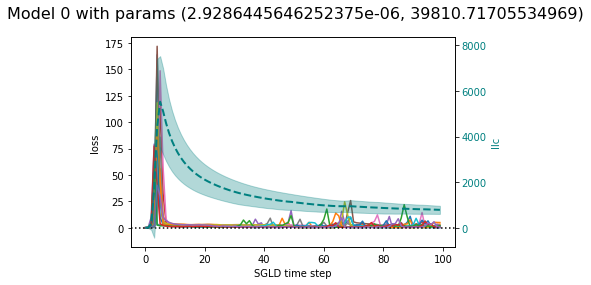

For model 0 with parameters (2.9286445646252375e-06, 39810.71705534969) we have spread 212.88824462890625



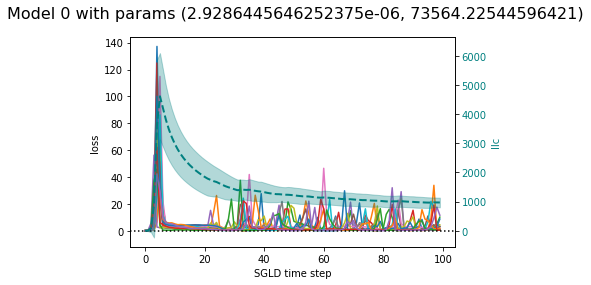

For model 0 with parameters (2.9286445646252375e-06, 73564.22544596421) we have spread 312.6885986328125



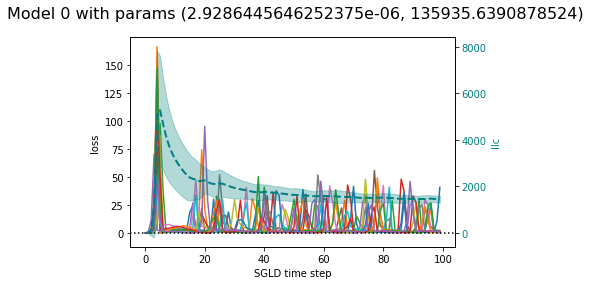

For model 0 with parameters (2.9286445646252375e-06, 135935.6390878524) we have spread 612.7244873046875



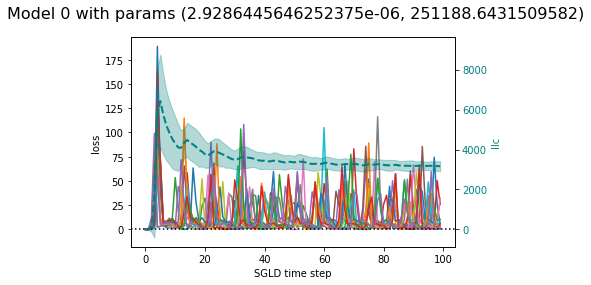

For model 0 with parameters (2.9286445646252375e-06, 251188.6431509582) we have spread 672.094482421875



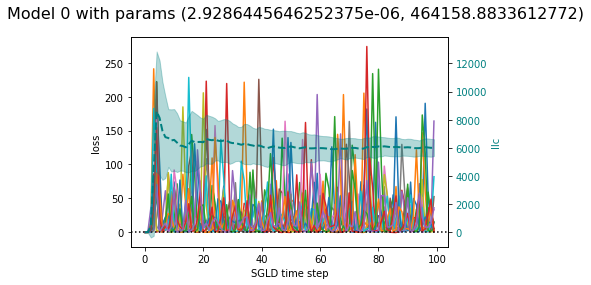

For model 0 with parameters (2.9286445646252375e-06, 464158.8833612772) we have spread 1084.71630859375



In [7]:
max_num_graphs = 50
num_graphs = 0
for params, result in results.items():
    if num_graphs >= max_num_graphs:
        break
    for modelno in range(10):
        model_result = result[modelno]
        mean = model_result["llc/means"][-1]
        std = model_result["llc/stds"][-1]
        upper = mean + std
        lower = mean - std
        if upper > 0 and lower < 0 or np.isnan(spreads[params]):
            continue
        else:
            lah.plot_single_graph(model_result, title=f"Model {modelno} with params {params}")
            num_graphs += 1
            print(f"For model {modelno} with parameters {params} we have spread {spreads[params]}")
            print()
            break

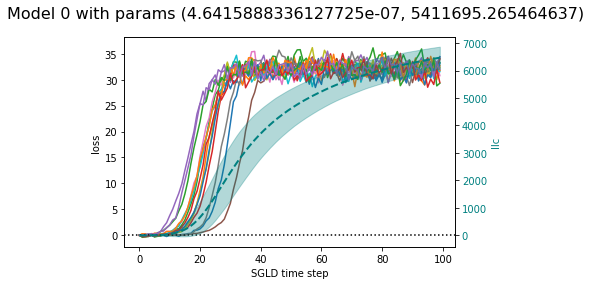

6469.35


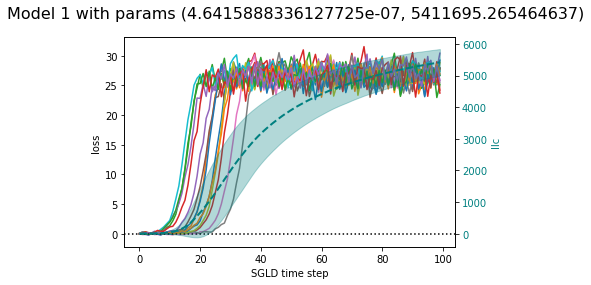

5418.403


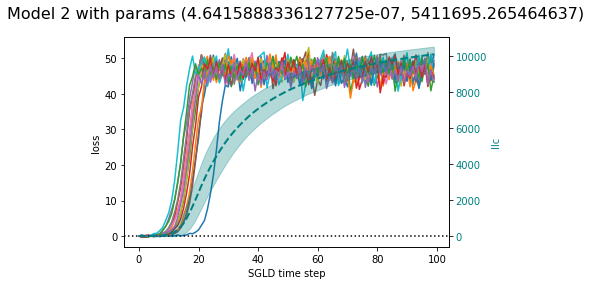

10112.491


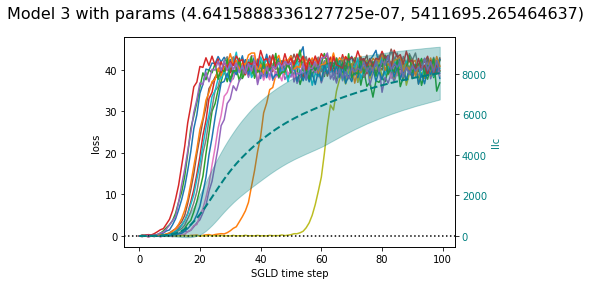

8034.5503


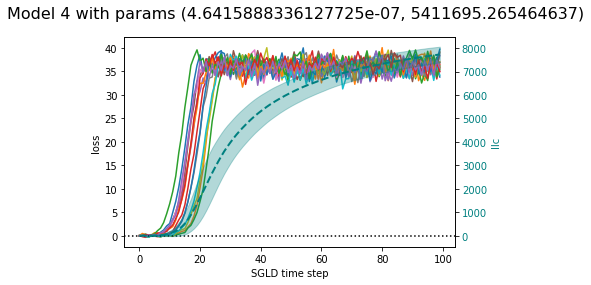

7726.9443


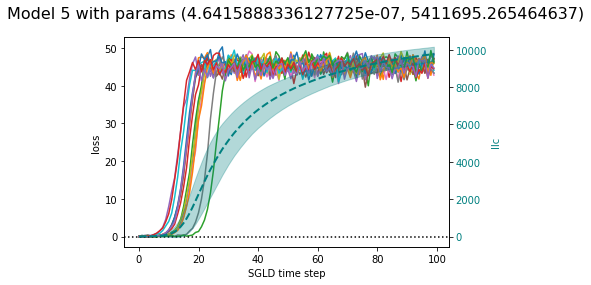

9772.7295


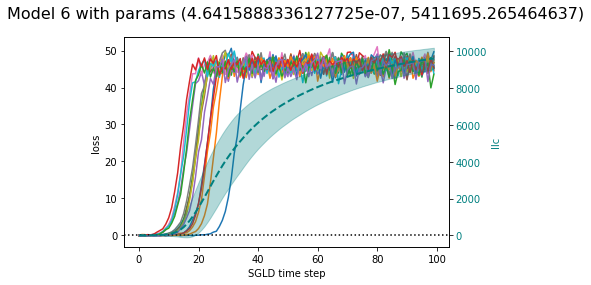

9617.105


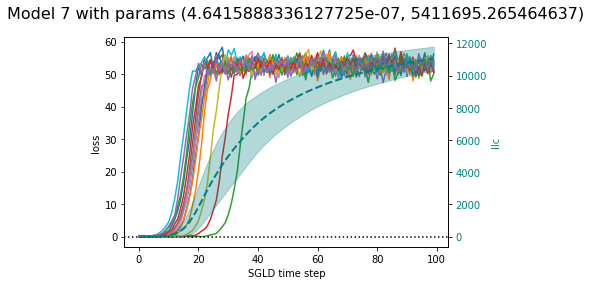

11052.928


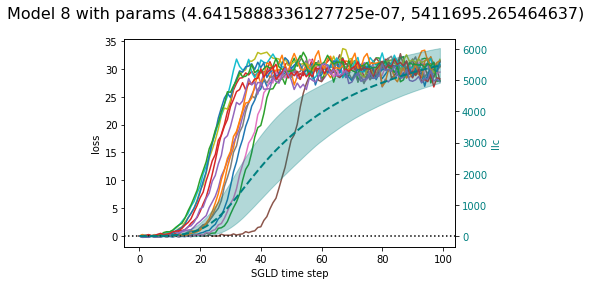

5476.0728


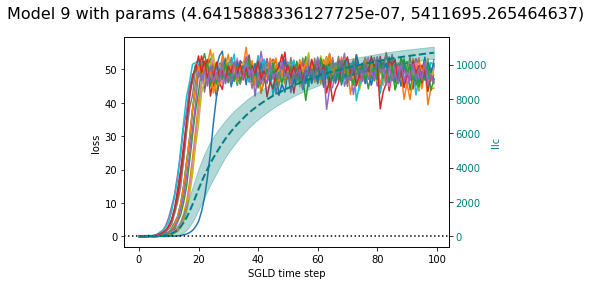

10687.878


In [14]:
for modelno in range(10):
    model_result = results[(4.6415888336127725e-07, 5411695.265464637)][modelno]
    lah.plot_single_graph(model_result, title=f"Model {modelno} with params (4.6415888336127725e-07, 5411695.265464637)")
    print(model_result["llc/means"][-1])